<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/11%EC%A3%BC%EC%B0%A8/AE_WISDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WISDM.csv', header=None)
df.columns = ['experiment_id', 'user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis']
display(df.head())

,experiment_id,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164


In [3]:
df.shape

(1048575, 7)

In [4]:
# 결측치 홗인

df.isnull().values.any()

np.False_

In [5]:
LABELS = ["Jogging", "Walking"]
df_filtered = df[df['activity'].isin(LABELS)]
display(df_filtered.head())

,experiment_id,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164


In [6]:
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_filtered.shape}")

Original DataFrame shape: (1048575, 7)
Filtered DataFrame shape: (732750, 7)


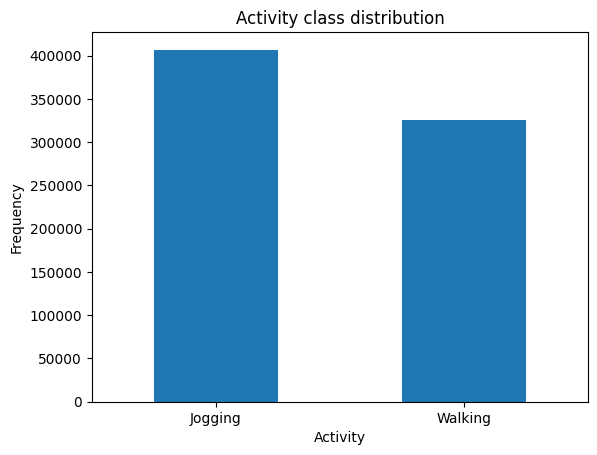

In [7]:
count_classes = df_filtered['activity'].value_counts(sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Activity class distribution")
plt.xticks(range(len(LABELS)), LABELS)
plt.xlabel("Activity")
plt.ylabel("Frequency");

In [8]:
Jogging = df_filtered[df_filtered['activity'] == 'Jogging']
Walking = df_filtered[df_filtered['activity'] == 'Walking']
print(f"Jogging data shape: {Jogging.shape}")
print(f"Walking data shape: {Walking.shape}")

Jogging data shape: (325975, 7)
Walking data shape: (406775, 7)


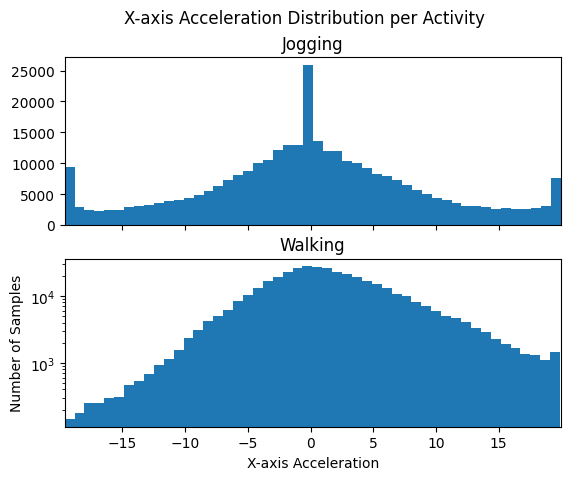

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('X-axis Acceleration Distribution per Activity')

bins = 50

ax1.hist(Jogging['x_axis'], bins = bins)
ax1.set_title('Jogging')

ax2.hist(Walking['x_axis'], bins = bins)
ax2.set_title('Walking')

plt.xlabel('X-axis Acceleration')
plt.ylabel('Number of Samples')
plt.xlim((Jogging['x_axis'].min(), Jogging['x_axis'].max())) # Adjust xlim to data range
plt.yscale('log')
plt.show();

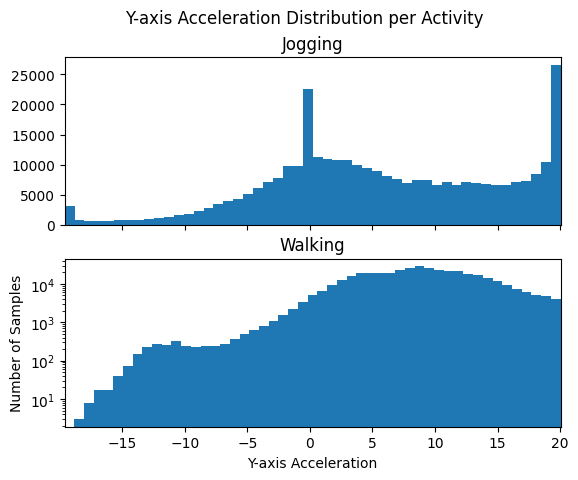

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Y-axis Acceleration Distribution per Activity')

bins = 50

ax1.hist(Jogging['y_axis'], bins = bins)
ax1.set_title('Jogging')

ax2.hist(Walking['y_axis'], bins = bins)
ax2.set_title('Walking')

plt.xlabel('Y-axis Acceleration')
plt.ylabel('Number of Samples')
plt.xlim((Jogging['y_axis'].min(), Jogging['y_axis'].max())) # Adjust xlim to data range
plt.yscale('log')
plt.show();

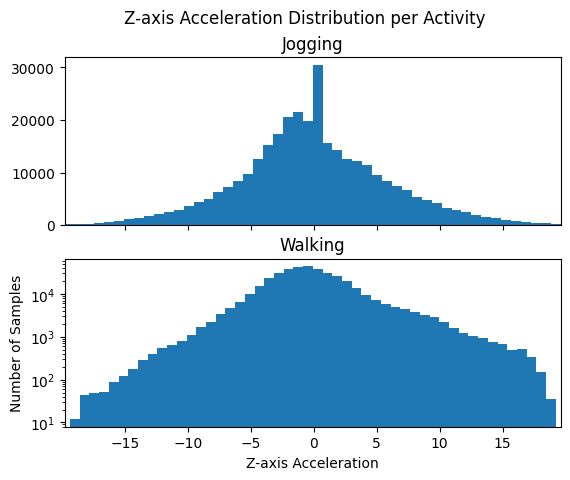

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Z-axis Acceleration Distribution per Activity')

bins = 50

ax1.hist(Jogging['z_axis'], bins = bins)
ax1.set_title('Jogging')

ax2.hist(Walking['z_axis'], bins = bins)
ax2.set_title('Walking')

plt.xlabel('Z-axis Acceleration')
plt.ylabel('Number of Samples')
plt.xlim((Jogging['z_axis'].min(), Jogging['z_axis'].max())) # Adjust xlim to data range
plt.yscale('log')
plt.show();

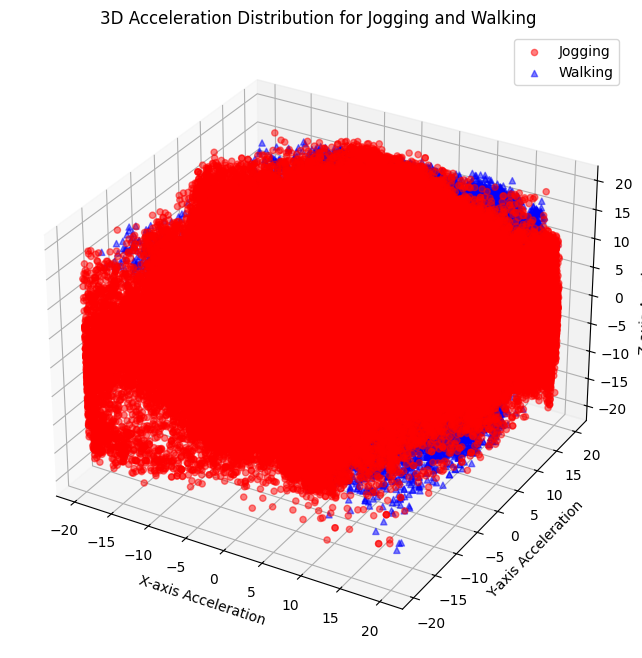

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Jogging data
ax.scatter(Jogging['x_axis'], Jogging['y_axis'], Jogging['z_axis'], c='red', marker='o', label='Jogging', alpha=0.5)

# Plot Walking data
ax.scatter(Walking['x_axis'], Walking['y_axis'], Walking['z_axis'], c='blue', marker='^', label='Walking', alpha=0.5)

ax.set_xlabel('X-axis Acceleration')
ax.set_ylabel('Y-axis Acceleration')
ax.set_zlabel('Z-axis Acceleration')
ax.set_title('3D Acceleration Distribution for Jogging and Walking')
ax.legend()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

data = df_filtered.drop(['experiment_id','user_id', 'timestamp'], axis=1) # user_id와 timestamp 제거
data.shape

(732750, 4)

In [14]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [15]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=64,
                          shuffle=True,
                          validation_split = 0.1,
                          callbacks=[early_stopping])

Epoch 1/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 6.9497 - val_loss: 5.9389e-05
Epoch 2/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.0572e-04 - val_loss: 3.4545e-04
Epoch 3/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.9942e-04 - val_loss: 1.1395e-06
Epoch 4/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.2443e-04 - val_loss: 1.4542e-06
Epoch 5/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.6026e-04 - val_loss: 6.5474e-06
Epoch 6/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.1285e-04 - val_loss: 9.6566e-05
Epoch 7/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.7576e-04 - val_loss: 3.4628e-07
Epoch 8/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.6148e-04 - val_loss: 3.4741e-07
Epoch 9/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.8623e-04 - val_loss: 1.9752e-07
Epoch 10/50
8244/8244 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.1611e-04 - val_loss: 7.4352e-06
Epoch 11/50
8244/8244 ━━━━━━━━━━━

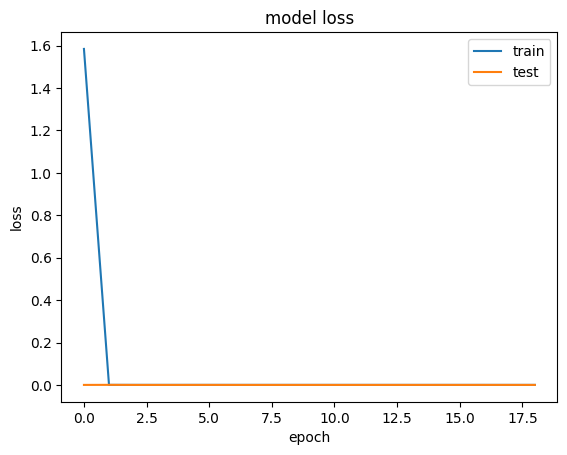

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [18]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_activity': y_test})
error_df.describe()
error_df.describe(include='all')

4580/4580 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


,reconstruction_error,true_activity
count,1.465500e+05,146550
unique,NaN,2
top,NaN,Walking
freq,NaN,81377
mean,1.408126e-07,NaN
std,7.605653e-06,NaN
min,5.467697e-13,NaN
25%,5.817302e-09,NaN
50%,1.575402e-08,NaN
75%,3.672558e-08,NaN


In [19]:
error_df.head()

,reconstruction_error,true_activity
813678,5.104830e-08,Jogging
760479,2.597123e-09,Jogging
774662,1.092072e-07,Jogging
105212,1.779699e-08,Walking
328244,1.568269e-08,Walking


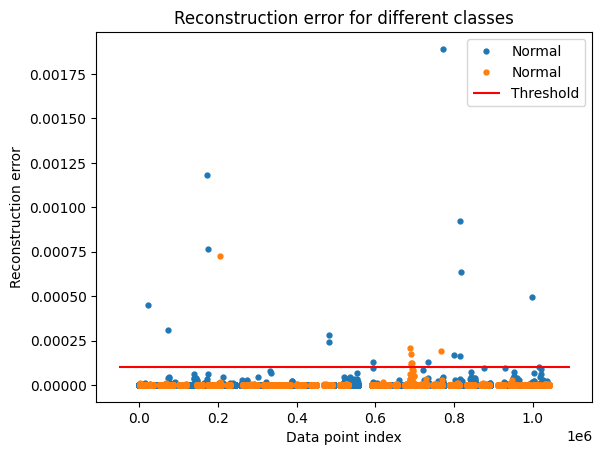

In [21]:
groups = error_df.groupby('true_activity')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(0.0001, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();